In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing the dataset
dataset = pd.read_csv(r'C:\Users\User\Downloads\german_credit_data.csv')

dataset.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
print(dataset.shape)

(1000, 11)


In [5]:
dataset.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [6]:
#continuous variables summary
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
#missing values
dataset.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
#filling missing values
dataset = dataset.fillna(dataset.mean())
dataset

C:\Users\User\AppData\Local\Temp/ipykernel_8084/1409912283.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


<AxesSubplot:>

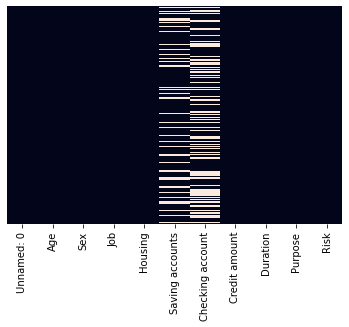

In [10]:
#plotting missing values
import seaborn as sns
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False)

<Figure size 432x288 with 0 Axes>

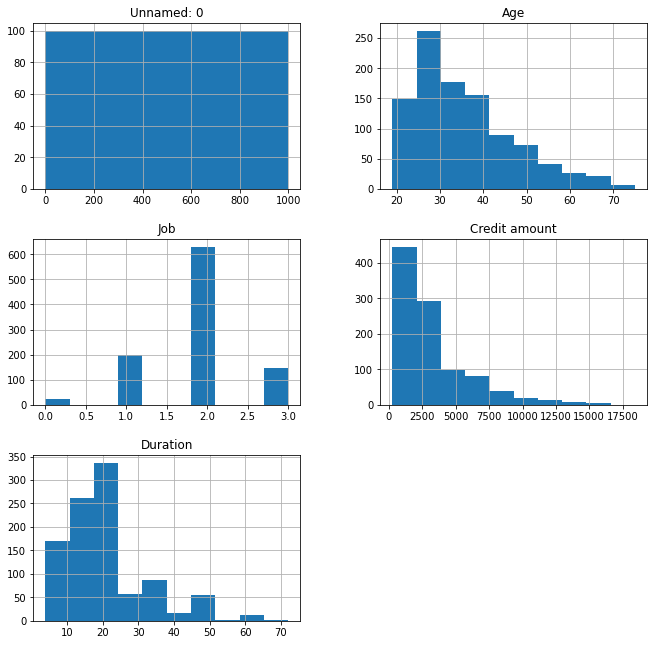

<Figure size 432x288 with 0 Axes>

In [16]:
#data visualization
#histogram
dataset.hist(figsize=(11,11))
plt.figure()

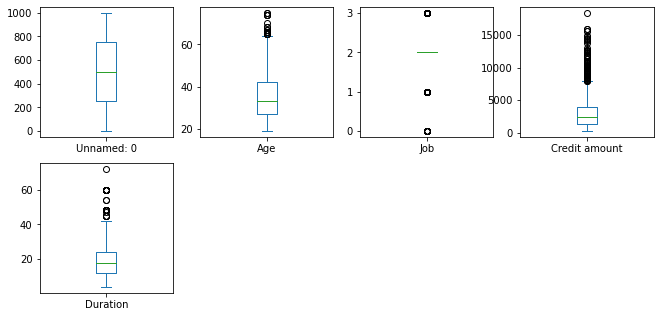

In [18]:
dataset.plot(kind='box', subplots=True, layout=(4,4), figsize=(11,11), sharex=False, sharey=False)
plt.show()

In [19]:
#removing outliers
dataset.loc[dataset['Age']>dataset['Age'].quantile(0.95),['Age']]=dataset['Age'].quantile(0.95)
dataset.loc[dataset['Job']>dataset['Job'].quantile(0.95),['Job']]=dataset['Job'].quantile(0.95)
dataset.loc[dataset['Credit amount']>dataset['Credit amount'].quantile(0.80),['Credit amount']]=dataset['Credit amount'].quantile(0.80)
dataset.loc[dataset['Duration']>dataset['Duration'].quantile(0.80),['Duration']]=dataset['Duration'].quantile(0.80)

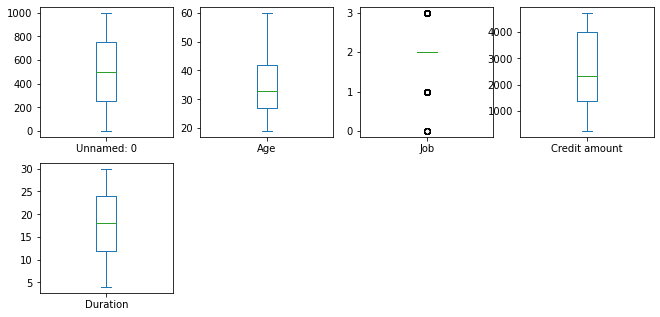

In [20]:
dataset.plot(kind='box', subplots=True, layout=(4,4), figsize=(11,11), sharex=False, sharey=False)
plt.show()

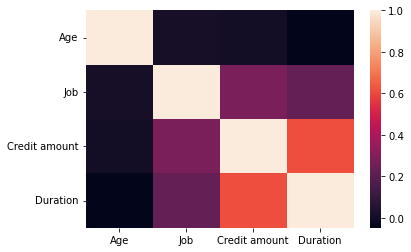

In [22]:
#correlation plots
import numpy as np
import seaborn as sns
#Multivariate plots (continuous vs continuous)
dataset1 = dataset[['Age','Job','Credit amount','Duration']]
names = ['Age','Job','Credit amount','Duration']

correlations = dataset1.corr()

sns.heatmap(correlations)
plt.show()